In [1]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from IPython.display import HTML, display
import tabulate
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from pandas_ml import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
import cv2
#from PIL import Image
#import scipy.misc

In [251]:
# Load dataset from CSV files
Base_DIR="/Users/apatkar/Documents/LiverpoolProject"
TwentyPercentTrainDataurl = Base_DIR+"/NSL_KDD-master-Original/20 Percent Training Set.csv"
KDDTestDataseturl = Base_DIR+"/NSL_KDD-master-Original/KDDTest+.csv"
KDDTrainDataseturl = Base_DIR+"/NSL_KDD-master-Original/KDDTrain+.csv"

# Load dataset from TXT files
#TwentyPercentTrainDataurl = Base_DIR+"/NSL_KDD-master/KDDTrain+_20Percent.txt"
#KDDTestDataseturl = Base_DIR+"/NSL_KDD-master/KDDTest+.txt"
#KDDTrainDataseturl = Base_DIR+"/NSL_KDD-master/KDDTrain+.txt"

names = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
         'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
         'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
         'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
         'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
         'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
         'dst_host_rerror_rate','dst_host_srv_rerror_rate','labels','dst_host_']

# Use when Reading CSV files
TwentyPercentTrainDataset = pandas.read_csv(TwentyPercentTrainDataurl, header=None, names=names)
KDDTestDataset = pandas.read_csv(KDDTestDataseturl, header=None, names=names)
KDDTrainDataset = pandas.read_csv(KDDTrainDataseturl, header=None, names=names)

#Use When Reading Text Files
#TwentyPercentTrainDataset = pandas.read_csv(TwentyPercentTrainDataurl, sep = ",", names=names)
#KDDTestDataset = pandas.read_csv(KDDTestDataseturl, sep = ",", names=names)
#KDDTrainDataset = pandas.read_csv(KDDTrainDataseturl, sep = ",", names=names)

#Copy Data set for Data Analysis
#dataset = TwentyPercentTrainDataset
#dataset = KDDTestDataset
dataset = KDDTrainDataset

#remove the last column
KDDTrainDataset.pop('dst_host_')
KDDTestDataset.pop('dst_host_')  
TwentyPercentTrainDataset.pop('dst_host_') 

# shape, this gives the dimensions of the dataset
display(HTML("<h3>Dimensions of the Training set: {TrainShape}</h3>".format(TrainShape=KDDTrainDataset.shape)))
display(HTML("<h3>Dimensions of the Test set: {TestShape}</h3>".format(TestShape=KDDTestDataset.shape)))

# Test set
display(HTML('<h2>Findout The categorical column & set of categories from Train Dataset:</h2>'))
for ColumnName in KDDTestDataset.columns:
    if KDDTrainDataset[ColumnName].dtypes == 'object' :
        UniqueCategory = len(KDDTrainDataset[ColumnName].unique())
        display(HTML("<h4> Dataset Column '{ColumnName}' has {UniqueCategory} categories</h4>".
                     format(ColumnName=ColumnName, UniqueCategory=UniqueCategory)))
display(HTML('<h2>Findout The categorical column & set of categories from Test Dataset:</h2>'))
for ColumnName in KDDTestDataset.columns:
    if KDDTestDataset[ColumnName].dtypes == 'object' :
        UniqueCategory = len(KDDTestDataset[ColumnName].unique())
        display(HTML("<h4> Dataset Column '{ColumnName}' has {UniqueCategory} categories</h4>".
                     format(ColumnName=ColumnName, UniqueCategory=UniqueCategory)))
        
# Find out the distribution of the Service category Which will help to decide on additional Dummy Columns
display(HTML("<h2>Service Column has following Distribution of categories:</h2>"))   
display(HTML(tabulate.tabulate(pandas.DataFrame(KDDTrainDataset['service'].value_counts().sort_values(ascending=False)), 
                               headers=['Service Type','Count'], tablefmt='html')))

Service Type,Count
http,40338
private,21853
domain_u,9043
smtp,7313
ftp_data,6860
eco_i,4586
other,4359
ecr_i,3077
telnet,2353
finger,1767


In [ ]:

# Look into the data using head command
print("~~~~~~~~~~~~~~~~~~~Printing 20 records from Training Dataset~~~~~~~~~~~~~~~~~~~")
display(HTML(tabulate.tabulate(KDDTrainDataset.head(20), headers=names, tablefmt='html')))
print("~~~~~~~~~~~~~~~~~~~Printing 20 records from Test Dataset~~~~~~~~~~~~~~~~~~~")
display(HTML(tabulate.tabulate(KDDTestDataset.head(20), headers=names, tablefmt='html')))

# Describe the data
print("~~~~~~~~~~~~~~~~~~~Printing Statistic Summary of Training Dataset~~~~~~~~~~~~~~~~~~~")
display(HTML(tabulate.tabulate(KDDTrainDataset.describe(), headers=names, tablefmt='html')))
print("~~~~~~~~~~~~~~~~~~~Printing Statistic Summary of Test Dataset~~~~~~~~~~~~~~~~~~~")
display(HTML(tabulate.tabulate(KDDTestDataset.describe(), headers=names, tablefmt='html')))

In [ ]:
# Label Distribution of the Training data set
display(HTML("<h2>Lable Distribution across the Training dataset:</h2>"))
display(HTML(tabulate.tabulate(pandas.DataFrame(KDDTrainDataset['labels'].value_counts()), 
                               headers=['Attack Type','Count'], tablefmt='html')))
display()
# Label Distribution of the Test data set
display(HTML("<h2>Lable Distribution across the Test dataset:</h2>"))
display(HTML(tabulate.tabulate(pandas.DataFrameDistributionColumns(KDDTestDataset['labels'].value_counts()), 
                               headers=['Attack Type','Count'], tablefmt='html')))
display()
# Check how Protocol Type Column attributes/values affects other data column
pandas.crosstab(KDDTrainDataset["protocol_type"],KDDTrainDataset["labels"],margins=True)

In [3]:
# Simplify the Lable data by manipulating it to attck and normal categories

dataset.loc[(dataset['labels'] !='normal'),'labels'] = 'attack'
dataset.loc[(dataset['labels'] =='normal'),'labels'] = 'normal'


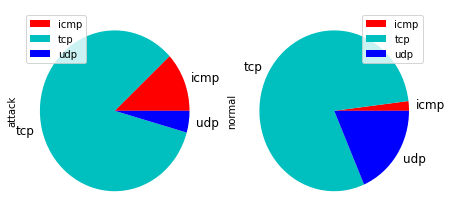

In [48]:
# Plot Pie Graph
PieDataSet = pandas.crosstab(KDDTrainDataset["protocol_type"],KDDTrainDataset["labels"],margins=True)
# Drop the Column Total
PieDataSet.pop('All')
# Drop The Row Total
PieDataSet.drop(PieDataSet.tail(1).index,inplace=True)
PieDataSet.plot.pie(subplots=True, colors=['r', 'c', 'b'], fontsize=12, figsize=(6, 3))
plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=1.0)
plt.show()

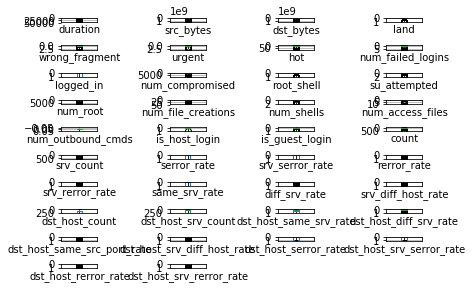

In [50]:
# box and whisker plots
plt.figure(figsize=(8, 6), dpi=80)
dataset.plot(kind='box', subplots=True, grid=True, layout=(11,4), sharex=True, sharey=False,)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

#sns.boxplot(data=dataset, orient="h")
#plt.show()

In [ ]:
# Plot The BOX graph for Protocol type and Rumber Of Compromised Column group by attack or normal dataset
BoxGraph = sns.FacetGrid(dataset, col="labels", sharex=False)
BoxGraph.map(sns.boxplot,"num_compromised", "protocol_type")
plt.show()

In [ ]:
# Plot The BarGrapg
sns.set(style='ticks', context='paper')
BarGraph = sns.FacetGrid(dataset, col='labels', hue='labels', size=3)
BarGraph.map(sns.barplot, 'num_compromised', 'protocol_type');
plt.show()
sns.barplot(x="num_compromised", y="protocol_type", hue="labels", data=dataset);
plt.show()
dataset.plot.barh(stacked=True)
plt.show()

In [ ]:
# Plot The histograms
dataset.hist()
plt.show()


In [ ]:
# Plot The ScatterPlot
Palette = dict(attack="seagreen", normal="red") #(tcp="seagreen", udp="gray", icmp="yellow")
ScatterPlot = sns.FacetGrid(dataset, hue="labels", palette=Palette, size=5)
ScatterPlot.map(plt.scatter, "protocol_type", "num_compromised", s=50, alpha=.7, linewidth=.5, edgecolor="white")
ScatterPlot.add_legend();
plt.show()

In [ ]:
with sns.axes_style("white"):
    g = sns.FacetGrid(dataset, row="protocol_type", col="labels", margin_titles=True, size=2.5)
g.map(plt.scatter, "num_failed_logins", "dst_host_count", color="#334488", edgecolor="white", lw=.5); #num_compromised
g.set_axis_labels("Failed Logins", "Numbers of Compromised");
g.set(xticks=[0, 5, 10], yticks=[0, 250, 500]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);
plt.show()

In [51]:
# Set the test and train data
traindata = pandas.read_csv(KDDTrainDataseturl, header=None, names=names)
testdata = pandas.read_csv(KDDTestDataseturl, header=None, names=names)

# Save Images of Normal and Attack data before we 
# Create Dummy Data Frame From the Training Data Set
DummyDataFrame = traindata
# Get the Lable Column from Dummy Data Frame
LableColumnDataFrame=DummyDataFrame['labels']
# change the label column 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R
DummyDataFrame2=LableColumnDataFrame.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

# Add the modified label column back
DummyDataFrame['labels'] = DummyDataFrame2
# Filter Out The data by Lable
DosData = DummyDataFrame.loc[DummyDataFrame['labels'] == 1]
ProbData = DummyDataFrame.loc[DummyDataFrame['labels'] == 2]
R2LData = DummyDataFrame.loc[DummyDataFrame['labels'] == 3]
U2RData = DummyDataFrame.loc[DummyDataFrame['labels'] == 4]
NormalData = DummyDataFrame.loc[DummyDataFrame['labels'] == 0]

# Display statement to view the filtered data
#display(HTML(tabulate.tabulate(DosData.head(5), tablefmt='html')))
#display(HTML(tabulate.tabulate(ProbData.head(5), tablefmt='html')))
#display(HTML(tabulate.tabulate(R2LData.head(5), tablefmt='html')))
#display(HTML(tabulate.tabulate(U2RData.head(5), tablefmt='html')))
#display(HTML(tabulate.tabulate(NormalData.head(5), tablefmt='html')))

# Take the random smaple of fileterd out dataset for Image creation we are taking 3 randon rows
frames = [DosData.sample(n=3, random_state=2), ProbData.sample(n=3, random_state=2), 
          R2LData.sample(n=3, random_state=2), U2RData.sample(n=3, random_state=2),
          NormalData.sample(n=3, random_state=2)
         ]
# Join, Concatinate the diffrent filetred dDtaFrames
ImageData = pandas.concat(frames)

# Set the Protocol Type Column to Numeric values in DataFrame
ImageData.loc[(dataset['protocol_type'] =='tcp'),'protocol_type'] = 1
ImageData.loc[(dataset['protocol_type'] =='udp'),'protocol_type'] = 2
ImageData.loc[(dataset['protocol_type'] =='icmp'),'protocol_type'] = 3
# For this test Image coversion purpose change the Service & Flag column to zero in this dataframe
ImageData.loc[(dataset['service'] !=''),'service'] = 0
ImageData.loc[(dataset['flag'] !=''),'flag'] = 0

# Set the Counter
IDX = 0
#print(ImageData.shape)
for index, row in ImageData.iterrows():
    # Get all the column data from the DataFrame row
    IMGDT = ImageData.iloc[IDX,1:43]
    #print(IMGDT)
    # Get The Lable data to add to the name to identify type of attack image is for
    RowType = IMGDT['labels']
    # Convert the data to Numpy Array
    IDT = np.array(IMGDT)
    # Convert the data to Binary
    ISA = np.select([IDT <= .5, IDT>.5], [np.zeros_like(IDT), np.ones_like(IDT)])
    # Create the Numpy array of converted data
    NPData = np.array(ISA * 255, dtype = np.uint8)
    # Create a grayscale image using CV2 function
    grayscale = cv2.adaptiveThreshold(NPData, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
    # Recsale created Grascale Image to 32x32
    Image32_32 = cv2.resize(grayscale, (32,32))
    # Add new axies/dimension to the image
    Image32_32_1 = Image32_32[:, :, np.newaxis]
    # Generate the Image Iname
    imagename = 'IMG_'+str(IDX)+'_'+str(RowType)+'.png'
    # Save Original and convered Image
    cv2.imwrite(imagename,Image32_32_1)
    cv2.imwrite('U'+imagename,grayscale)
    #C lear up the Numply Array for next operation and increment the Index
    np.delete(IDT, 1, 0)
    IDX = IDX+1
        

In [52]:
        
# Get the Label column adjusted
traindata.loc[(dataset['labels'] !='normal'),'labels'] = 'attack'
traindata.loc[(dataset['labels'] =='normal'),'labels'] = 'normal'
testdata.loc[(dataset['labels'] !='normal'),'labels'] = 'attack'
testdata.loc[(dataset['labels'] =='normal'),'labels'] = 'normal'

# A list of categorical columns into a variable, categorical_columns for training data
CategoricalColumnsTrain=['protocol_type', 'service', 'flag']
# A list of categorical columns into a variable, categorical_columns for test data
CategoricalColumnsTest=['protocol_type', 'service', 'flag'] 
 # Create a 2D numpy array of the categorical values
TrainDataCategoricalValues = traindata[CategoricalColumnsTrain]
display(HTML(tabulate.tabulate(TrainDataCategoricalValues.head(), tablefmt='html')))
TestDataCategoricalValues = testdata[CategoricalColumnsTest]
display(HTML(tabulate.tabulate(TestDataCategoricalValues.head(), tablefmt='html')))

# Dummy column creation process
# Create names for the dummy protocol type coumns
UniqueProtocolName=sorted(traindata.protocol_type.unique())
ColumnNameOne = 'Protocol_type_'
UniqueProtocolNameList=[ColumnNameOne + x for x in UniqueProtocolName]
# Create names for the dummy service columns
UniqueServiceName=sorted(traindata.service.unique())
ColumnNameTwo = 'service_'
UniqueServiceNameList=[ColumnNameTwo + x for x in UniqueServiceName]
# Create names for the dummy flag coulmns
UniqueFlagValue=sorted(traindata.flag.unique())
ColumnNameThree = 'flag_'
UniqueFlagValueList=[ColumnNameThree + x for x in UniqueFlagValue]
# Join all the dummy columns name
TrainDummyColumnList=UniqueProtocolNameList + UniqueServiceNameList + UniqueFlagValueList
print("~~~~~~~~~~~~~~~~~~~Training Data Set Dummy Column List~~~~~~~~~~~~~~~~~~~")
print (TrainDummyColumnList)

# do same for test set
TestUniqueProtocolName=sorted(testdata.protocol_type.unique())
TestUniqueProtocolNameList=[ColumnNameOne + x for x in TestUniqueProtocolName]
TestUniqueServiceName=sorted(testdata.service.unique())
TestUniqueServiceNameList=[ColumnNameTwo + x for x in TestUniqueServiceName]
TestUniqueFlagValue=sorted(traindata.flag.unique())
TestUniqueFlagValueList=[ColumnNameThree + x for x in TestUniqueFlagValue]
TestDummyColumnList=TestUniqueProtocolNameList + TestUniqueServiceNameList + TestUniqueFlagValueList
print("~~~~~~~~~~~~~~~~~~~Testing Data Set Dummy Column List~~~~~~~~~~~~~~~~~~~")
print (TestDummyColumnList)

# apply lable encoder to the created Dummy column values
EncodedTrainDataCategoricalValues=TrainDataCategoricalValues.apply(LabelEncoder().fit_transform)
display(HTML(tabulate.tabulate(EncodedTrainDataCategoricalValues.head(), tablefmt='html')))
# perform same on the test set
EncodedTestDataCategoricalValues=TestDataCategoricalValues.apply(LabelEncoder().fit_transform)
display(HTML(tabulate.tabulate(EncodedTestDataCategoricalValues.head(), tablefmt='html')))

# Apply one hot encoder to the dummy data
OHEncoder = OneHotEncoder()
EncodedTrainDataCategoricalValuesOHE = OHEncoder.fit_transform(EncodedTrainDataCategoricalValues)
TrainCategoriesData = pandas.DataFrame(EncodedTrainDataCategoricalValuesOHE.toarray(),columns=TrainDummyColumnList)
# Perform Same on the Test set
EncodedTestDataCategoricalValuesOHE = OHEncoder.fit_transform(EncodedTestDataCategoricalValues)
TestCategoriesData = pandas.DataFrame(EncodedTestDataCategoricalValuesOHE.toarray(),columns=TestDummyColumnList)

TrainCategoriesData.head()

TraingServiceList=traindata['service'].tolist()
TestServiceList= testdata['service'].tolist()
MissingServicesList=list(set(TraingServiceList) - set(TestServiceList))
ServiceLable = 'service_'
MissingServicesList=[ServiceLable + x for x in MissingServicesList]
MissingServicesList

for col in MissingServicesList:
    TestCategoriesData[col] = 0

TestCategoriesData.shape
# Joing the encoded data to original dataframe 
NewTrainingData=traindata.join(TrainCategoriesData)
NewTrainingData.drop('flag', axis=1, inplace=True)
NewTrainingData.drop('protocol_type', axis=1, inplace=True)
NewTrainingData.drop('service', axis=1, inplace=True)
# Perform Same action on Test data
NewTestData=testdata.join(TestCategoriesData)
NewTestData.drop('flag', axis=1, inplace=True)
NewTestData.drop('protocol_type', axis=1, inplace=True)
NewTestData.drop('service', axis=1, inplace=True)
print(NewTrainingData.shape)
print(NewTestData.shape)
display(HTML(tabulate.tabulate(NewTrainingData.head(), tablefmt='html')))
        
display(HTML(tabulate.tabulate(NewTestData.head(), tablefmt='html')))

0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


~~~~~~~~~~~~~~~~~~~Training Data Set Dummy Column List~~~~~~~~~~~~~~~~~~~
['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service

0,1,20,9
1,2,44,9
2,1,49,5
3,1,24,9
4,1,24,9


0,1,45,1
1,1,45,1
2,1,19,9
3,0,13,9
4,1,55,2


(125973, 124)
(22543, 124)


0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,150,25,0.17,0.03,0.17,0,0,0,0.05,0,normal,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0.08,0.15,0,255,1,0,0.6,0.88,0,0,0,0,0,normal,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1,1,0,0,0.05,0.07,0,255,26,0.1,0.05,0,0,1,1,0,0,attack,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0,0,1,0,0,30,255,1,0,0.03,0.04,0.03,0.01,0,0.01,normal,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0,0,0,0,1,0,0.09,255,255,1,0,0,0,0,0,0,0,normal,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0,0,1,1,0.04,0.06,0,255,10,0.04,0.06,0,0,0,0,1,1,normal,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0,0,1,1,0.01,0.06,0,255,1,0,0.06,0,0,0,0,1,1,normal,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,134,86,0.61,0.04,0.61,0.02,0,0,0,0,attack,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0,0,0,0,1,0,1,3,57,1,0,1,0.28,0,0,0,0,normal,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0,0.12,1,0.5,1,0,0.75,29,86,0.31,0.17,0.03,0.02,0,0,0.83,0.71,normal,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [254]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
NewTrainingData.plot(kind='density', subplots=True, layout=(12,12), sharex=False)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

LinAlgError: singular matrix

In [53]:
#
# Label Encoding manually to make sure the conversions happens correctly
# take label column from train Test Dataset
LabelColVal=NewTrainingData['labels']
TestLabelColVal=NewTestData['labels']
# change the label column for train, test dataset
NewLabelColVal=LabelColVal.replace({ 'normal' : 0, 'attack' : 1})
NewTestLabelColVal=TestLabelColVal.replace({ 'normal' : 0, 'attack' : 1})
# put the new label column back
NewTrainingData['labels'] = NewLabelColVal
NewTestData['labels'] = NewTestLabelColVal

display(HTML(tabulate.tabulate(NewTrainingData.head(), tablefmt='html')))
        
display(HTML(tabulate.tabulate(NewTestData.head(), tablefmt='html')))

X = NewTrainingData.iloc[:,1:124]
Y = NewTrainingData.iloc[:,0]
C = NewTestData.iloc[:,0]
T = NewTestData.iloc[:,1:124]

# Perform the split of the training data into Training and Validation data set
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


scalerXT = Normalizer().fit(X_train)
trainX = scalerXT.transform(X_train)

scalerXV = Normalizer().fit(X_validation)
trainXV = scalerXV.transform(X_validation)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

Traindata = np.array(trainX)
Trainlabel = np.array(Y_train)

Validationdata = np.array(trainXV)
Validationlabel = np.array(Y_validation)

Testdata = np.array(testT)
Testlabel = np.array(C)

print("~~~End Of Data Prep~~~")

0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,150,25,0.17,0.03,0.17,0,0,0,0.05,0,0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0,0,0,0,0.08,0.15,0,255,1,0,0.6,0.88,0,0,0,0,0,0,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1,1,0,0,0.05,0.07,0,255,26,0.1,0.05,0,0,1,1,0,0,1,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0,0,1,0,0,30,255,1,0,0.03,0.04,0.03,0.01,0,0.01,0,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0,0,0,0,1,0,0.09,255,255,1,0,0,0,0,0,0,0,0,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0,0,1,1,0.04,0.06,0,255,10,0.04,0.06,0,0,0,0,1,1,0,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0,0,1,1,0.01,0.06,0,255,1,0,0.06,0,0,0,0,1,1,0,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,134,86,0.61,0.04,0.61,0.02,0,0,0,0,1,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0,0,0,0,1,0,1,3,57,1,0,1,0.28,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0,0.12,1,0.5,1,0,0.75,29,86,0.31,0.17,0.03,0.02,0,0,0.83,0.71,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


~~~End Of Data Prep~~~


In [ ]:

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
ModelsList = []
ModelsList.append(('LR', LogisticRegression()))
ModelsList.append(('LDA', LinearDiscriminantAnalysis()))
ModelsList.append(('KNN', KNeighborsClassifier()))
ModelsList.append(('CART', DecisionTreeClassifier()))
ModelsList.append(('NB', GaussianNB()))
ModelsList.append(('SVM', SVC()))
# evaluate each model in turn
ResultsList = []
NamesOfModel = []
for ModelName, Model in ModelsList:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    CrossValidationResults = model_selection.cross_val_score(Model, X_train, Y_train, cv=kfold, scoring=scoring)
    ResultsList.append(CrossValidationResults)
    NamesOfModel.append(ModelName)
    msg = "%s: %f (%f)" % (ModelName, CrossValidationResults.mean(), CrossValidationResults.std())
    print(msg)

In [ ]:
#SVM SVC Model
print("~~~~~~~~~~~~~~~~~~~Start Of SVM SVC model~~~~~~~~~~~~~~~~~~~")
clf = SVC(kernel='linear',class_weight="balanced", max_iter=100000000)
clf.fit(NewTrainingData, Trainlabel)
clf_predict = clf.predict(NewTestData)
print(clf.score(NewTestData, Testlabel))
print(metrics.classification_report(Testlabel, clf_predict))
print("~~~~~~~~~~~~~~~~~~~End Of SVM SVC model~~~~~~~~~~~~~~~~~~~")

In [67]:
print("~~~~~~~~~~~~~~~~~~~Start Of Naive Bayes model~~~~~~~~~~~~~~~~~~~")
# fit a Naive Bayes model to the data
GNBmodel = GaussianNB()
GNBmodel.fit(Traindata, Trainlabel)
display(GNBmodel)
# make predictions
GNBexpected = Testlabel
GNBpredicted = GNBmodel.predict(Testdata)

GNBcm = ConfusionMatrix(GNBexpected, GNBpredicted)
#display(GNBexpected.shape)
#display(GNBpredicted.shape)
GNBexpected = np.array(GNBexpected)
predicted = np.array(GNBpredicted)
GNBcm.print_stats()

np.savetxt('GNBexpected.txt', GNBexpected, fmt='%01d')
np.savetxt('GNBpredicted.txt', GNBpredicted , fmt='%01d')

display(GNBcm)
display(HTML("<h4> Naive Bayes model PredictedResults Shape: '{GNBP}'</h4>".
                     format(ColumnName=ColumnName, GNBP=GNBexpected.shape))) #GNBexpected.shape)
display(HTML("<h4> Naive Bayes model ExpectedResults Shape: '{GNBE}'</h4>".
                     format(ColumnName=ColumnName, GNBE=GNBpredicted.shape)))
#display(GNBpredicted.shape)
GNBcm.stats()

GNBaccuracy = accuracy_score(GNBexpected, GNBpredicted)
GNBprecision = precision_score(GNBexpected, GNBpredicted, average='weighted')
GNBrecall = recall_score(GNBexpected, GNBpredicted, average='weighted')
GNBf1 = 2 * (GNBprecision * GNBrecall) / (GNBprecision + GNBrecall)

display(HTML("<h3>Accuracy</h3>"))
display(HTML(str.format('{0:.3f}', GNBaccuracy)))

display(HTML("<h3>precision</h3>"))
display(HTML(str.format('{0:.3f}', GNBprecision))) 

display(HTML("<h3>recall</h3>"))
display(HTML(str.format('{0:.3f}', GNBrecall)))

display(HTML("<h3>f1-score</h3>"))
display(HTML(str.format('{0:.3f}', GNBf1)))

print("~~~~~~~~~~~~~~~~~~~End Of Naive Bayes model~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~Start Of Naive Bayes model~~~~~~~~~~~~~~~~~~~


GaussianNB(priors=None)

/Users/apatkar/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/Users/apatkar/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
/Users/apatkar/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN + self.FP) * (self.TN + self.FN)))
/Users/apatkar/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:332: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)
/Users/apatkar/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:191: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.P)
/Users/apatkar/a

Confusion Matrix:

Predicted      0    1   2   3    4   5    6   7  8  9   ...     20741  22174  \
Actual                                                  ...                    
0          13576  166   4  28  174   7  675  43  0  0   ...         0      0   
1            118    1   1   0    1   1    2   1  0  0   ...         0      0   
2             62    0   4   0    0   0    2   0  0  0   ...         0      0   
3             52    2   0   0    0   0    1   0  0  0   ...         0      0   
4             13    0   0   0    0   1    5   0  0  0   ...         0      0   
5             12    3   1   2    0   0   13   2  0  0   ...         0      0   
6             11    0   0   0    0   0    0   1  0  0   ...         0      0   
7              6    0   0   0    0   0    0   0  0  0   ...         0      0   
8              5    0   0   0    0   0    0   1  0  0   ...         0      0   
9              3    0   1   0    0   0    0   0  0  0   ...         0      0   
10             6    0

Predicted      0    1   2   3    4   5    6   7  8  9   ...     20741  22174  \
Actual                                                  ...                    
0          13576  166   4  28  174   7  675  43  0  0   ...         0      0   
1            118    1   1   0    1   1    2   1  0  0   ...         0      0   
2             62    0   4   0    0   0    2   0  0  0   ...         0      0   
3             52    2   0   0    0   0    1   0  0  0   ...         0      0   
4             13    0   0   0    0   1    5   0  0  0   ...         0      0   
5             12    3   1   2    0   0   13   2  0  0   ...         0      0   
6             11    0   0   0    0   0    0   1  0  0   ...         0      0   
7              6    0   0   0    0   0    0   0  0  0   ...         0      0   
8              5    0   0   0    0   0    0   1  0  0   ...         0      0   
9              3    0   1   0    0   0    0   0  0  0   ...         0      0   
10             6    0   0   0    0   0  

/Users/apatkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/apatkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


~~~~~~~~~~~~~~~~~~~End Of Naive Bayes model~~~~~~~~~~~~~~~~~~~


In [68]:

print("~~~~~~~~~~~~~~~~~~~Start Of k-nearest neighbor model~~~~~~~~~~~~~~~~~~~")
# fit a k-nearest neighbor model to the data
KNmodel = KNeighborsClassifier()
KNmodel.fit(Traindata, Trainlabel)
print(KNmodel)
# make predictions
KNexpected = Testlabel
KNpredicted = KNmodel.predict(Testdata)
# summarize the fit of the model

KNcm = metrics.confusion_matrix(KNexpected, KNpredicted)
print(KNcm)
KNtpr = float(KNcm[0][0])/np.sum(KNcm[0])
KNfpr = float(KNcm[1][1])/np.sum(KNcm[1])
KNaccuracy = accuracy_score(KNexpected, KNpredicted)
KNprecision = precision_score(KNexpected, KNpredicted, average='weighted')
KNrecall = recall_score(KNexpected, KNpredicted, average='weighted')
KNf1 = 2 * (KNprecision * KNrecall) / (KNprecision + KNrecall)

display(HTML("<h3>Accuracy</h3>"))
display(HTML(str.format('{0:.3f}', KNaccuracy)))

display(HTML("<h3>precision</h3>"))
display(HTML(str.format('{0:.3f}', KNprecision))) 

display(HTML("<h3>recall</h3>"))
display(HTML(str.format('{0:.3f}', KNrecall)))

display(HTML("<h3>f-score</h3>"))
display(HTML(str.format('{0:.3f}', KNf1)))

display(HTML("<h3>FPR</h3>"))
display(HTML(str.format('{0:.3f}', KNfpr)))

display(HTML("<h3>TPR</h3>"))
display(HTML(str.format('{0:.3f}', KNtpr)))

np.savetxt('KNexpected.txt', KNexpected, fmt='%01d')
np.savetxt('KNpredicted.txt', KNpredicted, fmt='%01d')
print("~~~~~~~~~~~~~~~~~~~End Of k-nearest neighbor model~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~Start Of k-nearest neighbor model~~~~~~~~~~~~~~~~~~~
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
[[18853    70    10 ...,     0     0     0]
 [  551    25     4 ...,     0     0     0]
 [   97     4     0 ...,     0     0     0]
 ..., 
 [    0     0     0 ...,     0     0     0]
 [    1     0     0 ...,     0     0     0]
 [    0     0     0 ...,     0     0     0]]


/Users/apatkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/apatkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


~~~~~~~~~~~~~~~~~~~End Of k-nearest neighbor model~~~~~~~~~~~~~~~~~~~


In [69]:

print("~~~~~~~~~~~~~~~~~~~Start Of Decision Tree model~~~~~~~~~~~~~~~~~~~")
# fit a Decision Tree model to the data
DTmodel = DecisionTreeClassifier()
DTmodel.fit(Traindata, Trainlabel)
print(DTmodel)

# make predictions
DTexpected = Testlabel
DTpredicted = DTmodel.predict(Testdata)

# summarize the fit of the model

DTcm = metrics.confusion_matrix(DTexpected, DTpredicted)
print(DTcm)
DTtpr = float(DTcm[0][0])/np.sum(DTcm[0])
DTfpr = float(DTcm[1][1])/np.sum(DTcm[1])
DTaccuracy = accuracy_score(DTexpected, DTpredicted)
DTprecision = precision_score(DTexpected, DTpredicted, average='weighted')
DTrecall = recall_score(DTexpected, DTpredicted, average='weighted')
DTf1 = 2 * (DTprecision * DTrecall) / (DTprecision + DTrecall)

display(HTML("<h3>Accuracy</h3>"))
display(HTML(str.format('{0:.3f}', DTaccuracy)))

display(HTML("<h3>precision</h3>"))
display(HTML(str.format('{0:.3f}', DTprecision))) 

display(HTML("<h3>recall</h3>"))
display(HTML(str.format('{0:.3f}', DTrecall)))

display(HTML("<h3>f-score</h3>"))
display(HTML(str.format('{0:.3f}', DTf1)))

display(HTML("<h3>FPR</h3>"))
display(HTML(str.format('{0:.3f}', DTfpr)))

display(HTML("<h3>TPR</h3>"))
display(HTML(str.format('{0:.3f}', DTtpr)))

np.savetxt('DTexpected.txt', DTexpected, fmt='%01d')
np.savetxt('DTpredicted.txt', DTpredicted, fmt='%01d')
print("~~~~~~~~~~~~~~~~~~~End Of Decision Tree model~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~Start Of Decision Tree model~~~~~~~~~~~~~~~~~~~
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[[17771   203   150 ...,     0     0     0]
 [  538     0    27 ...,     0     0     0]
 [   80     0    14 ...,     0     0     0]
 ..., 
 [    1     0     0 ...,     0     0     0]
 [    1     0     0 ...,     0     0     0]
 [    0     0     0 ...,     0     0     0]]


/Users/apatkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/apatkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


~~~~~~~~~~~~~~~~~~~End Of Decision Tree model~~~~~~~~~~~~~~~~~~~


In [70]:

print("~~~~~~~~~~~~~~~~~~~Start Of Random Forest model~~~~~~~~~~~~~~~~~~~")
# fit a Random Forest model to the data
RFmodel = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=20)
RFmodel = RFmodel.fit(Traindata, Trainlabel)

# make predictions
RFexpected = Testlabel
RFpredicted = RFmodel.predict(Testdata)
# summarize the fit of the model

RFcm = metrics.confusion_matrix(RFexpected, RFpredicted)
print(RFcm)
RFtpr = float(RFcm[0][0])/np.sum(RFcm[0])
RFfpr = float(RFcm[1][1])/np.sum(RFcm[1])
RFaccuracy = accuracy_score(RFexpected, RFpredicted)
RFprecision = precision_score(RFexpected, RFpredicted, average='weighted')
RFrecall = recall_score(RFexpected, RFpredicted, average='weighted')
RFf1 = 2 * (RFprecision * RFrecall) / (RFprecision + RFrecall)

display(HTML("<h3>Accuracy</h3>"))
display(HTML(str.format('{0:.3f}', RFaccuracy)))

display(HTML("<h3>precision</h3>"))
display(HTML(str.format('{0:.3f}', RFprecision))) 

display(HTML("<h3>recall</h3>"))
display(HTML(str.format('{0:.3f}', RFrecall)))

display(HTML("<h3>f-score</h3>"))
display(HTML(str.format('{0:.3f}', RFf1)))

display(HTML("<h3>FPR</h3>"))
display(HTML(str.format('{0:.3f}', RFfpr)))

display(HTML("<h3>TPR</h3>"))
display(HTML(str.format('{0:.3f}', RFtpr)))
#print("%.3f" %RFtpr)
#print("%.3f" %RFfpr)
#print("Accuracy")
#print("%.3f" %RFaccuracy)
#print("precision")
#print("%.3f" %RFprecision)
#print("recall")
#print("%.3f" %RFrecall)
#print("f-score")
#print("%.3f" %RFf1)
#print("fpr")
#print("%.3f" %RFfpr)
#print("tpr")
#print("%.3f" %RFtpr)
np.savetxt('RFexpected.txt', RFexpected, fmt='%01d')
np.savetxt('RFpredicted.txt', RFpredicted, fmt='%01d')
print("~~~~~~~~~~~~~~~~~~~End Of Random Forest model~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~Start Of Random Forest model~~~~~~~~~~~~~~~~~~~
[[19017     0     0 ...,     0     0     0]
 [  587     0     0 ...,     0     0     0]
 [  103     0     0 ...,     0     0     0]
 ..., 
 [    1     0     0 ...,     0     0     0]
 [    1     0     0 ...,     0     0     0]
 [    1     0     0 ...,     0     0     0]]


/Users/apatkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/apatkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


~~~~~~~~~~~~~~~~~~~End Of Random Forest model~~~~~~~~~~~~~~~~~~~


In [71]:
print("~~~~~~~~~~~~~~~~~~~Start Of Multinomial Naive Bayes model~~~~~~~~~~~~~~~~~~~")

# fit a Multinomial Naive Bayes model to the data
MNBmodel = MultinomialNB()
MNBmodel.fit(Traindata, Trainlabel)
print(MNBmodel)
# make predictions
MNBexpected = Testlabel
MNBpredicted = MNBmodel.predict(Testdata)

MNBcm = ConfusionMatrix(MNBexpected, MNBpredicted)
#display(MNBexpected.shape)
#display(MNBpredicted.shape)
MNBexpected = np.array(MNBexpected)
MNBpredicted = np.array(MNBpredicted)
MNBcm.print_stats()

np.savetxt('MNBexpected.txt', MNBexpected, fmt='%01d')
np.savetxt('MNBpredicted.txt', MNBpredicted, fmt='%01d')

display(MNBcm)
display(HTML("<h4> Multinomial Naive Bayes model PredictedResults Shape: '{MNBP}'</h4>".
                     format(ColumnName=ColumnName, MNBP=MNBexpected.shape))) #GNBexpected.shape)
display(HTML("<h4> Multinomial Naive Bayes model ExpectedResults Shape: '{MNBE}'</h4>".
                     format(ColumnName=ColumnName, MNBE=MNBpredicted.shape)))
#display(GNBpredicted.shape)
MNBcm.stats()

MNBaccuracy = accuracy_score(MNBexpected, MNBpredicted)
MNBprecision = precision_score(MNBexpected, MNBpredicted, average='weighted')
MNBrecall = recall_score(MNBexpected, MNBpredicted, average='weighted')
MNBf1 = 2 * (MNBprecision * MNBrecall) / (MNBprecision + MNBrecall)

display(HTML("<h3>Accuracy</h3>"))
display(HTML(str.format('{0:.3f}', MNBaccuracy)))

display(HTML("<h3>precision</h3>"))
display(HTML(str.format('{0:.3f}', MNBprecision))) 

display(HTML("<h3>recall</h3>"))
display(HTML(str.format('{0:.3f}', MNBrecall)))

display(HTML("<h3>f-score</h3>"))
display(HTML(str.format('{0:.3f}', MNBf1)))

print("~~~~~~~~~~~~~~~~~~~End Of Multinomial Naive Bayes model~~~~~~~~~~~~~~~~~~~")


~~~~~~~~~~~~~~~~~~~Start Of Multinomial Naive Bayes model~~~~~~~~~~~~~~~~~~~
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


/Users/apatkar/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:259: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TN) / self.NegativeTest)
/Users/apatkar/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:304: RuntimeWarning: invalid value encountered in true_divide
  (self.TN + self.FP) * (self.TN + self.FN)))
/Users/apatkar/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:339: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FNR) / self.TNR)
/Users/apatkar/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:251: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FN) / self.NegativeTest)
/Users/apatkar/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/User

Confusion Matrix:

Predicted      0  1  2  3  4  5  6  7  8  9   ...     16500  20741  22174  \
Actual                                        ...                           
0          19017  0  0  0  0  0  0  0  0  0   ...         0      0      0   
1            587  0  0  0  0  0  0  0  0  0   ...         0      0      0   
2            103  0  0  0  0  0  0  0  0  0   ...         0      0      0   
3            120  0  0  0  0  0  0  0  0  0   ...         0      0      0   
4            539  0  0  0  0  0  0  0  0  0   ...         0      0      0   
5            146  0  0  0  0  0  0  0  0  0   ...         0      0      0   
6             35  0  0  0  0  0  0  0  0  0   ...         0      0      0   
7             15  0  0  0  0  0  0  0  0  0   ...         0      0      0   
8             15  0  0  0  0  0  0  0  0  0   ...         0      0      0   
9             12  0  0  0  0  0  0  0  0  0   ...         0      0      0   
10            15  0  0  0  0  0  0  0  0  0   ...        

Predicted      0  1  2  3  4  5  6  7  8  9   ...     16500  20741  22174  \
Actual                                        ...                           
0          19017  0  0  0  0  0  0  0  0  0   ...         0      0      0   
1            587  0  0  0  0  0  0  0  0  0   ...         0      0      0   
2            103  0  0  0  0  0  0  0  0  0   ...         0      0      0   
3            120  0  0  0  0  0  0  0  0  0   ...         0      0      0   
4            539  0  0  0  0  0  0  0  0  0   ...         0      0      0   
5            146  0  0  0  0  0  0  0  0  0   ...         0      0      0   
6             35  0  0  0  0  0  0  0  0  0   ...         0      0      0   
7             15  0  0  0  0  0  0  0  0  0   ...         0      0      0   
8             15  0  0  0  0  0  0  0  0  0   ...         0      0      0   
9             12  0  0  0  0  0  0  0  0  0   ...         0      0      0   
10            15  0  0  0  0  0  0  0  0  0   ...         0      0      0   

/Users/apatkar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


~~~~~~~~~~~~~~~~~~~End Of Multinomial Naive Bayes model~~~~~~~~~~~~~~~~~~~


In [72]:
# ImageCreation Function
def CreateGrayScaleImage(DataFrameX):
    ImageList = []
    IDX = 0
    # Arguments DataFrameX sent as DataFrame
    for index, row in DataFrameX.iterrows():
        #print(IDX)
        # Get all the column data from the DataFrame row
        IMGDT = DataFrameX.iloc[IDX,1:124]
        #print(IMGDT)
        #RowType = IMGDT['labels']
        # Convert the data to Numpy Array
        IDT = np.array(IMGDT)
        # Convert the data to Binary
        ISA = np.select([IDT <= .5, IDT>.5], [np.zeros_like(IDT), np.ones_like(IDT)])
        # Create the Numpy array of converted data
        img = np.array(ISA * 255, dtype = np.uint8)
        # Create a grayscale image using CV2 function
        grayscale = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
        # Recsale created Grascale Image to 32x32
        Image32_32 = cv2.resize(grayscale, (32,32))
        # Add new axies/dimension to the image
        Image32_32_1 = Image32_32[:, :, np.newaxis]
        ImageList.append(Image32_32_1)
        # Clear up the Numply Array for next operation and increment the Index
        np.delete(img, 1, 0)
        IDX = IDX+1
        
    return ImageList

#  empty regular list
ValImageArray = [] 
ValLable1 = []
TrainImageArray = []
TrainLable1 = []

# Set The Index Column in DataFrame
NewTrainingData.set_index('labels')

NewTrainingData1 = NewTrainingData.sample(n=50, random_state=2) #head(150)
TrainLable1 = np.array(NewTrainingData1['labels'])
TrainImageArray = CreateGrayScaleImage(NewTrainingData1)

#print(TrainImageArray)
#print(TrainLable1)
#print(len(TrainLable1))
#print(len(TrainImageArray))

TrainLableT1=TrainLable1[0:35]
TrainLableV1=TrainLable1[35:50]
TrainImageArrayT1=TrainImageArray[0:35]
TrainImageArrayV1=TrainImageArray[35:50]

#print(len(TrainLableT1))
#print(len(TrainImageArrayT1))
#print(len(TrainLableV1))
#print(len(TrainImageArrayV1))

NewTestData1 = NewTestData.sample(n=50, random_state=2)
TestLable1 = np.array(NewTestData1['labels'])
TestImageArray = CreateGrayScaleImage(NewTestData1)

print("~~~End Of Image Preperation~~~")

~~~End Of Image Preperation~~~


In [73]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 10
BATCH_SIZE = 124 #Size/Numbers of our Attribute/Columns

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

/Users/apatkar/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [74]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [75]:
from sklearn.utils import shuffle

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(TrainImageArray) #X_train)
    
    assert(len(TrainImageArray) == len(TrainLable1))
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(TrainImageArrayT1, TrainLableT1) #X_train, Y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            print(end,offset,BATCH_SIZE)
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(TrainImageArrayV1, TrainLableV1) #X_validation, Y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(TestImageArray, TestLable1) #X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...

124 0 124
EPOCH 1 ...
Validation Accuracy = 0.733

124 0 124
EPOCH 2 ...
Validation Accuracy = 0.533

124 0 124
EPOCH 3 ...
Validation Accuracy = 0.533

124 0 124
EPOCH 4 ...
Validation Accuracy = 0.533

124 0 124
EPOCH 5 ...
Validation Accuracy = 0.733

124 0 124
EPOCH 6 ...
Validation Accuracy = 0.933

124 0 124
EPOCH 7 ...
Validation Accuracy = 0.933

124 0 124
EPOCH 8 ...
Validation Accuracy = 0.867

124 0 124
EPOCH 9 ...
Validation Accuracy = 0.933

124 0 124
EPOCH 10 ...
Validation Accuracy = 0.933

Model saved
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.500


In [ ]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.python.framework import ops
ops.reset_default_graph()

# Start a graph session
sess = tf.Session()

def Create28x28GrayScaleImage(Row):
    #display(Row)
    IMGDT = Row.iloc[1:124]
    # Convert the data to Numpy Array
    IDT = np.array(IMGDT)
    # Convert the data to Binary
    ISA = np.select([IDT <= .5, IDT>.5], [np.zeros_like(IDT), np.ones_like(IDT)])
    # Create the Numpy array of converted data
    img = np.array(ISA * 255, dtype = np.uint8)
    # Create a grayscale image using CV2 function
    grayscale = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
    # Recsale created Grascale Image to 28x28
    Image28x28 = cv2.resize(grayscale, (28,28))
    # Add new axies/dimension to the image
    #Image32_32_1 = Image32_32[:, :, np.newaxis]
        
    return Image28x28

NewTrainingData2 = NewTrainingData.sample(n=10000, random_state=2)
TrainLable2 = np.array(NewTrainingData2['labels'])

TRIMGLst = []
for index, Trainrow in NewTrainingData2.iterrows():
    TRIMGLst.append(Create28x28GrayScaleImage(Trainrow))

NewTrainingData3 = np.array(TRIMGLst)

NewTestData2 = NewTestData.sample(n=10000, random_state=2)
TestLable2 = np.array(NewTestData2['labels'])

TSIMGLst = []
for index, Testrow in NewTestData2.iterrows():
    TSIMGLst.append(Create28x28GrayScaleImage(Testrow))

NewTestData3 = np.array(TSIMGLst)

# Convert images into 28x28 (they are 32x32)
train_xdata = NewTrainingData3
test_xdata = NewTestData3
 
# Above Converted labels into one-hot encoded vectors
train_labels = TrainLable2
test_labels = TestLable2

display(train_labels)
display(test_labels)
print("~~~End Of Image Preperation2 Creation~~~")

In [208]:
# Set model parameters
batch_size = 1000
learning_rate = 0.0001
evaluation_size = 500
image_width = train_xdata[0].shape[0]
image_height = train_xdata[0].shape[1]
target_size = max(train_labels) + 1
num_channels = 1 # greyscale = 1 channel
generations = 500
eval_every = 5
conv1_features = 25
conv2_features = 50
max_pool_size1 = 2 # NxN window for 1st max pool layer
max_pool_size2 = 2 # NxN window for 2nd max pool layer
fully_connected_size1 = 100

x_input_shape = (batch_size, image_width, image_height, num_channels)
x_input = tf.placeholder(tf.float32, shape=x_input_shape)
y_target = tf.placeholder(tf.int32, shape=(batch_size))

eval_input_shape = (evaluation_size, image_width, image_height, num_channels)
eval_input = tf.placeholder(tf.float32, shape=eval_input_shape)
eval_target = tf.placeholder(tf.int32, shape=(evaluation_size))

# Convolutional layer variables
conv1_weight = tf.Variable(tf.truncated_normal([4, 4, num_channels, conv1_features],
                                               stddev=0.1, dtype=tf.float32))
conv1_bias = tf.Variable(tf.zeros([conv1_features], dtype=tf.float32))

conv2_weight = tf.Variable(tf.truncated_normal([4, 4, conv1_features, conv2_features],
                                               stddev=0.1, dtype=tf.float32))
conv2_bias = tf.Variable(tf.zeros([conv2_features], dtype=tf.float32))

#display(conv1_weight)
#display(conv1_bias)
#display(conv2_weight)
#display(conv2_bias)
# fully connected variables
resulting_width = image_width // (max_pool_size1 * max_pool_size2)
resulting_height = image_height // (max_pool_size1 * max_pool_size2)
full1_input_size = resulting_width * resulting_height * conv2_features
full1_weight = tf.Variable(tf.truncated_normal([full1_input_size, fully_connected_size1],
                          stddev=0.1, dtype=tf.float32))
full1_bias = tf.Variable(tf.truncated_normal([fully_connected_size1], stddev=0.1, dtype=tf.float32))
full2_weight = tf.Variable(tf.truncated_normal([fully_connected_size1, target_size],
                                               stddev=0.1, dtype=tf.float32))
full2_bias = tf.Variable(tf.truncated_normal([target_size], stddev=0.1, dtype=tf.float32))
print("~~~End Of My TF Model Creation~~~")

~~~End Of My TF Model Creation~~~


In [209]:
# Initialize Model Operations
def my_conv_net(input_data):
    # First Conv-ReLU-MaxPool Layer
    conv1 = tf.nn.conv2d(input_data, conv1_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_bias))
    max_pool1 = tf.nn.max_pool(relu1, ksize=[1, max_pool_size1, max_pool_size1, 1],
                               strides=[1, max_pool_size1, max_pool_size1, 1], padding='SAME')
    tf.nn.dropout(0.2,0.1)
    # Second Conv-ReLU-MaxPool Layer
    conv2 = tf.nn.conv2d(max_pool1, conv2_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_bias))
    max_pool2 = tf.nn.max_pool(relu2, ksize=[1, max_pool_size2, max_pool_size2, 1],
                               strides=[1, max_pool_size2, max_pool_size2, 1], padding='SAME')
    tf.nn.dropout(0.01,0.01)
    # Transform Output into a 1xN layer for next fully connected layer
    final_conv_shape = max_pool2.get_shape().as_list()
    final_shape = final_conv_shape[1] * final_conv_shape[2] * final_conv_shape[3]
    flat_output = tf.reshape(max_pool2, [final_conv_shape[0], final_shape])

    # First Fully Connected Layer
    fully_connected1 = tf.nn.relu(tf.add(tf.matmul(flat_output, full1_weight), full1_bias))

    # Second Fully Connected Layer
    final_model_output = tf.add(tf.matmul(fully_connected1, full2_weight), full2_bias)
    
    return(final_model_output)

model_output = my_conv_net(x_input)
test_model_output = my_conv_net(eval_input)

# Declare Loss Function (softmax cross entropy)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model_output, labels=y_target))

# Create a prediction function
prediction = tf.nn.softmax(model_output)
test_prediction = tf.nn.softmax(test_model_output)

# Create accuracy function
def get_accuracy(logits, targets):
    batch_predictions = np.argmax(logits, axis=1)
    num_correct = np.sum(np.equal(batch_predictions, targets))
    return(100. * num_correct/batch_predictions.shape[0])

# Create an optimizer
my_optimizer = tf.train.MomentumOptimizer(learning_rate, 0.9)
train_step = my_optimizer.minimize(loss)

# Initialize Variables
init = tf.global_variables_initializer()
sess.run(init)

# Start training loop
train_loss = []
train_acc = []
test_acc = []
for i in range(generations):
    rand_index = np.random.choice(len(train_xdata), size=batch_size)
    rand_x = train_xdata[rand_index]
    rand_x = np.expand_dims(rand_x, 3)
    rand_y = train_labels[rand_index]
    train_dict = {x_input: rand_x, y_target: rand_y}
    
    sess.run(train_step, feed_dict=train_dict)
    temp_train_loss, temp_train_preds = sess.run([loss, prediction], feed_dict=train_dict)
    temp_train_acc = get_accuracy(temp_train_preds, rand_y)
    
    if (i+1) % eval_every == 0:
        eval_index = np.random.choice(len(test_xdata), size=evaluation_size)
        #display(len(test_xdata),eval_index,len(test_labels))
        eval_x = test_xdata[eval_index]
        eval_x = np.expand_dims(eval_x, 3)
        eval_y = test_labels[eval_index]
        test_dict = {eval_input: eval_x, eval_target: eval_y}
        test_preds = sess.run(test_prediction, feed_dict=test_dict)
        temp_test_acc = get_accuracy(test_preds, eval_y)
        
        # Record and print results
        train_loss.append(temp_train_loss)
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)
        acc_and_loss = [(i+1), temp_train_loss, temp_train_acc, temp_test_acc]
        acc_and_loss = [np.round(x,2) for x in acc_and_loss]
        print('Generation # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))
        
display(np.mean(temp_test_acc))

Generation # 5. Train Loss: 35.02. Train Acc (Test Acc): 80.60 (57.20)
Generation # 10. Train Loss: 9.37. Train Acc (Test Acc): 89.10 (68.60)
Generation # 15. Train Loss: 6.22. Train Acc (Test Acc): 90.20 (85.20)
Generation # 20. Train Loss: 3.56. Train Acc (Test Acc): 89.60 (71.60)
Generation # 25. Train Loss: 0.55. Train Acc (Test Acc): 97.60 (81.60)
Generation # 30. Train Loss: 0.57. Train Acc (Test Acc): 98.60 (79.80)
Generation # 35. Train Loss: 0.44. Train Acc (Test Acc): 98.90 (76.40)
Generation # 40. Train Loss: 0.16. Train Acc (Test Acc): 99.20 (79.00)
Generation # 45. Train Loss: 0.27. Train Acc (Test Acc): 99.00 (83.80)
Generation # 50. Train Loss: 0.11. Train Acc (Test Acc): 99.20 (82.00)
Generation # 55. Train Loss: 0.17. Train Acc (Test Acc): 99.60 (81.80)
Generation # 60. Train Loss: 0.45. Train Acc (Test Acc): 99.30 (82.40)
Generation # 65. Train Loss: 0.24. Train Acc (Test Acc): 99.60 (84.00)
Generation # 70. Train Loss: 0.04. Train Acc (Test Acc): 99.60 (83.60)
Genera

86.0

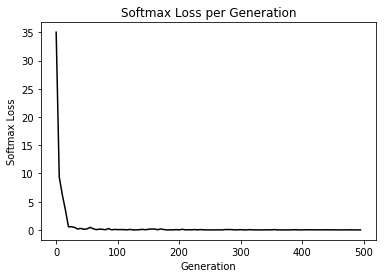

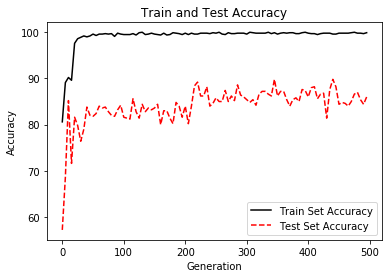

In [210]:
# Matlotlib code to plot the loss and accuracies
eval_indices = range(0, generations, eval_every)
# Plot loss over time
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Softmax Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Softmax Loss')
plt.show()

# Plot train and test accuracy
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

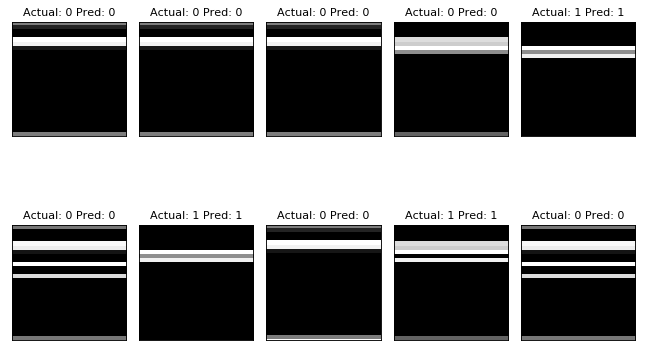

In [250]:
# Plot some samples
# Plot the 10 of the last batch results:
actuals = rand_y[0:10]
predictions = np.argmax(temp_train_preds,axis=1)[0:10]
images = np.squeeze(rand_x[0:10])

Nrows = 2
Ncols = 5
# plot with various axes scales and set the Figure Size for the image
plt.figure(1)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

for i in range(10):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(images[i], cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]), fontsize=10)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


In [327]:

def Create28x28GSImage(chunk):
    IDT = chunk
    #display(chunk)
    new_data = []
    for i in range(0, len(IDT), 8):
        new_data.append(IDT[i:i+8])  # 8 digit binary list
    int_data = [] 
    for i in new_data:
        i=str(i)
        #display(ord(i[0]))
        int_data = bytearray((ord(i[0]), ord(i[1]), ord(i[2]), ord(i[3]), ord(i[4]), ord(i[5]), ord(i[6]), ord(i[7])))        
        #int_data.append(int(bin(i),2)) 
    a= bytearray(int_data)
    # Convert the data to Binary
    #ISA = np.select([IDT <= .5, IDT>.5], [np.zeros_like(IDT), np.ones_like(IDT)])
    # Create the Numpy array of converted data
    img = np.array(a) #, dtype = np.uint8)
    #display(img)
    # Create a grayscale image using CV2 function
    grayscale = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
    # Recsale created Grascale Image to 28x28
    Image28x28 = cv2.resize(grayscale, (28,28))
    
    return Image28x28

PCPTSTIMGLst = []
PCPIDX = 0
BinaryFilePath = Base_DIR + '/Advantech.pcap'
TestLableX = []

with open(BinaryFilePath, "rb") as f:
    for chunk in iter(lambda: f.read(128), b""):
        ImageGSI = Create28x28GSImage(chunk)
        PCPTSTIMGLst.append(ImageGSI)      
        TestLableX.append(1)
        # Generate the Image Iname
        imagename = 'PCPIMG_'+str(PCPIDX)+'.png'
        # Save Original and convered Image
        #cv2.imwrite(imagename,ImageGSI)
        #Increment Index
        PCPIDX += 1
            
PCPNewTestData3 = np.array(PCPTSTIMGLst)
TestLable3 = np.array(TestLableX)
display(PCPNewTestData3.shape)
display(TestLable3.shape)
display(train_labels.shape)
display(test_xdata.shape)

(315, 28, 28)

(315,)

(10000,)

(10000, 28, 28)

In [328]:
test_xdata2 = PCPNewTestData3
test_labels2 = TestLable3

# Start training loop
train_loss2 = []
train_acc2 = []
test_acc2 = []
for i in range(generations):
    rand_index = np.random.choice(len(train_xdata), size=batch_size)
    rand_x = train_xdata[rand_index]
    rand_x = np.expand_dims(rand_x, 3)
    rand_y = train_labels[rand_index]
    train_dict = {x_input: rand_x, y_target: rand_y}
    
    sess.run(train_step, feed_dict=train_dict)
    temp_train_loss, temp_train_preds = sess.run([loss, prediction], feed_dict=train_dict)
    temp_train_acc = get_accuracy(temp_train_preds, rand_y)
    
    if (i+1) % eval_every == 0:
        eval_index = np.random.choice(len(test_xdata2), size=evaluation_size)
        #display(len(test_xdata),eval_index,len(test_labels))
        eval_x = test_xdata2[eval_index]
        eval_x = np.expand_dims(eval_x, 3)
        eval_y = test_labels2[eval_index]
        test_dict2 = {eval_input: eval_x, eval_target: eval_y}
        test_preds2 = sess.run(test_prediction, feed_dict=test_dict)
        temp_test_acc = get_accuracy(test_preds2, eval_y)
        
        # Record and print results
        train_loss2.append(temp_train_loss)
        train_acc2.append(temp_train_acc)
        test_acc2.append(temp_test_acc)
        acc_and_loss = [(i+1), temp_train_loss, temp_train_acc, temp_test_acc]
        acc_and_loss = [np.round(x,2) for x in acc_and_loss]
        print('Generation # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))
        
display(np.mean(temp_test_acc))

Generation # 5. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (56.20)
Generation # 10. Train Loss: 0.02. Train Acc (Test Acc): 99.70 (56.20)
Generation # 15. Train Loss: 0.03. Train Acc (Test Acc): 99.70 (56.20)
Generation # 20. Train Loss: 0.01. Train Acc (Test Acc): 99.80 (56.20)
Generation # 25. Train Loss: 0.03. Train Acc (Test Acc): 99.50 (56.20)
Generation # 30. Train Loss: 0.00. Train Acc (Test Acc): 99.70 (54.40)
Generation # 35. Train Loss: 0.00. Train Acc (Test Acc): 100.00 (56.00)
Generation # 40. Train Loss: 0.01. Train Acc (Test Acc): 99.80 (57.20)
Generation # 45. Train Loss: 0.00. Train Acc (Test Acc): 99.80 (57.20)
Generation # 50. Train Loss: 0.00. Train Acc (Test Acc): 99.80 (57.20)
Generation # 55. Train Loss: 0.00. Train Acc (Test Acc): 99.60 (56.00)
Generation # 60. Train Loss: 0.00. Train Acc (Test Acc): 99.80 (54.40)
Generation # 65. Train Loss: 0.00. Train Acc (Test Acc): 99.70 (54.40)
Generation # 70. Train Loss: 0.00. Train Acc (Test Acc): 99.90 (57.40)
Gener

56.799999999999997